In [1]:
% matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import h5py

In [2]:
data = h5py.File('fonts.hdf5')

In [3]:
fonts = data['fonts']
dir(fonts[0])

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__r

In [4]:
len(fonts)

56443

In [5]:
fonts.shape

(56443, 62, 64, 64)

In [6]:
fonts[0].shape

(62, 64, 64)

In [7]:
fonts[0][0].min(), fonts[0][0].max()

(0, 255)

In [8]:
def display(array):
    array = array.reshape(64,64)
    fig,ax  = plt.subplots(1)
    ax.imshow(array)

    #print(array.shape)

In [9]:
all_chars = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789"

chars = { i: char for i, char in enumerate(all_chars) }

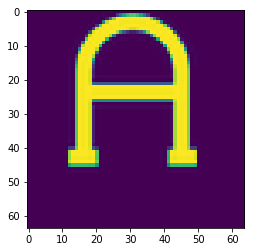

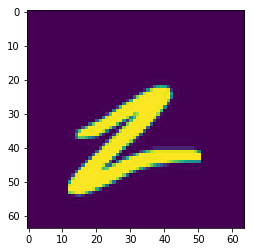

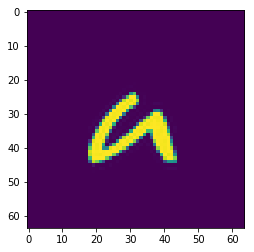

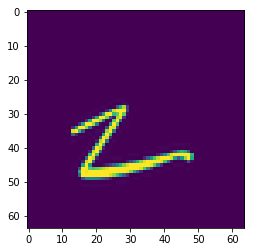

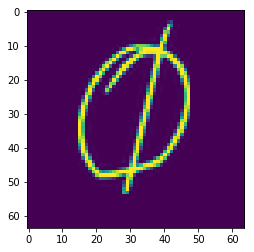

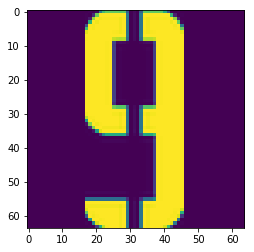

In [10]:
# font[font_type_index][character_index]
# Characters: "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789"
display(fonts[0][0])
display(fonts[1][25])
display(fonts[2][26])
display(fonts[3][51])
display(fonts[4][52])
display(fonts[5][61])

In [11]:
%%time

image_list = np.array(fonts).reshape(56443*62, 64, 64, 1)
#image_list = np.array(fonts).reshape(56443*62, 64, 64)
final_shape = image_list.shape
final_shape

CPU times: user 6.82 s, sys: 15.5 s, total: 22.3 s
Wall time: 31.8 s


In [12]:
image_list.dtype

dtype('uint8')

In [13]:
"""%%time

increment = 100000

for i in range(0, len(image_list), increment):
    normalized_images = image_list[i:i+increment] / 255
        
    print(i, normalized_images.shape)
    #all_normalized_images = np.array([all_normalized_images, normalized_images])
    np.savez('npz/fonts_{}.npz'.format(i), normalized_images)#

    #all_normalized_images.append(normalized_images)
    #if i > 3 * increment:
    #    break
       
    
#X = all_normalized_images

#print(X.shape)
#print(X.dtype)
"""

"%%time\n\nincrement = 100000\n\nfor i in range(0, len(image_list), increment):\n    normalized_images = image_list[i:i+increment] / 255\n        \n    print(i, normalized_images.shape)\n    #all_normalized_images = np.array([all_normalized_images, normalized_images])\n    np.savez('npz/fonts_{}.npz'.format(i), normalized_images)#\n\n    #all_normalized_images.append(normalized_images)\n    #if i > 3 * increment:\n    #    break\n       \n    \n#X = all_normalized_images\n\n#print(X.shape)\n#print(X.dtype)\n"

In [14]:
#X = image_list
X = image_list
y = np.array([i for _ in range(56443) for i in range(62)])

#display(fonts[101][0])
#display(image_list[6262])

In [15]:
from keras.utils import to_categorical

y = to_categorical(y)
y.shape

Using TensorFlow backend.


(3499466, 62)

In [16]:
print(X.shape)
print(y.shape)

(3499466, 64, 64, 1)
(3499466, 62)


FONT: 46668
CHAR: 54
(64, 64, 1)


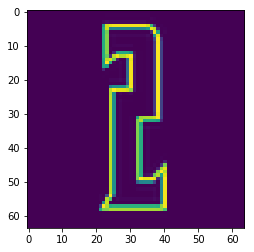

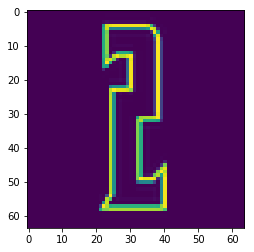

In [17]:
from random import randint

rand_font = randint(0, 56443)
rand_char = randint(0, 62)

print("FONT: {}".format(rand_font))
print("CHAR: {}".format(rand_char))

print(image_list[rand_font*62 + rand_char].shape)

display(fonts[rand_font][rand_char])
display(image_list[rand_font*62 + rand_char])


In [18]:
subset_num = 100000

X_subset = X[:subset_num]
y_subset = y[:subset_num]

print(X_subset.shape)
print(y_subset.shape)

(100000, 64, 64, 1)
(100000, 62)


In [19]:
%%time

X_subset = X_subset / 255

CPU times: user 2.67 s, sys: 1.25 s, total: 3.92 s
Wall time: 3.77 s


CHAR: H


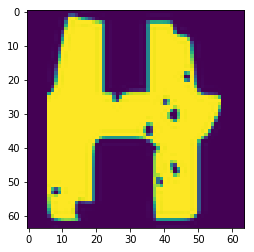

In [20]:
test_digit = randint(0, subset_num)
char_index = np.argmax(y[test_digit])

display(X_subset[test_digit])
print("CHAR: {}".format(chars[char_index]))


In [21]:
from sklearn.model_selection import train_test_split

X_subset_train, X_subset_test, y_subset_train, y_subset_test = train_test_split(X_subset, 
                                                                                y_subset, 
                                                                                test_size = .25, 
                                                                                random_state = 42
                                                                               )
X_subset_train.shape

(75000, 64, 64, 1)

In [22]:
"""X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = .25, 
                                                    random_state = 42
                                                   )
X_train.shape"""

'X_train, X_test, y_train, y_test = train_test_split(X, \n                                                    y, \n                                                    test_size = .25, \n                                                    random_state = 42\n                                                   )\nX_train.shape'

In [23]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, Activation, Reshape, Input
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint

from keras import backend as K

In [24]:
def create_model(in_shape):
    model = Sequential()

    model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu', input_shape=in_shape))
    model.add(MaxPooling2D(pool_size=2))
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters=1024, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(BatchNormalization())
    
    #model.add(Conv2D(filters=1024, kernel_size=2, padding='same', activation='relu'))
    #model.add(MaxPooling2D(pool_size=2))
    #model.add(BatchNormalization())

    model.add(GlobalAveragePooling2D())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(62, activation='softmax'))
    model.summary()
    return model

In [25]:
model = create_model((64,64,1))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 256)       1280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 512)       524800    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 512)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 512)       2048      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 1024)      2098176   
__________

In [26]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
#print(X_train.shape)
#print(y_train.shape)

In [28]:
batch_size = 256
epochs = 5

checkpointer = ModelCheckpoint(filepath='font_model.h5', 
                               verbose=1, 
                               save_best_only=True, 
                               monitor='acc',
                              )

history = model.fit(X_subset_train, 
          y_subset_train, 
          epochs=epochs, 
          batch_size=batch_size, 
          callbacks=[checkpointer],
          validation_split=0.25,
          verbose=1
         )

Train on 56250 samples, validate on 18750 samples
Epoch 1/5
56250/56250 [==============================] - 12993s - loss: 3.1829 - acc: 0.2160 - val_loss: 6.0246 - val_acc: 0.0154
Epoch 2/5
56250/56250 [==============================] - 12995s - loss: 2.1826 - acc: 0.4303 - val_loss: 4.9014 - val_acc: 0.0139
Epoch 3/5
56250/56250 [==============================] - 13008s - loss: 1.8160 - acc: 0.5072 - val_loss: 3.6016 - val_acc: 0.1377
Epoch 4/5
56250/56250 [==============================] - 12994s - loss: 1.5998 - acc: 0.5497 - val_loss: 2.6660 - val_acc: 0.3061
Epoch 5/5
56250/56250 [==============================] - 12977s - loss: 1.4377 - acc: 0.5847 - val_loss: 2.9182 - val_acc: 0.3210


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


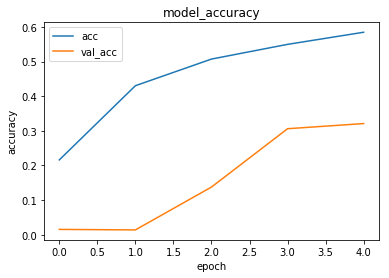

In [29]:
print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc','val_acc'], loc='upper left')
plt.show()

In [30]:
# 3 layers, batch 256, epochs 5, validation split .25, 404 seconds, 2 - 14.76 accuracy
# 3 layers, batch 512, epochs 5, validation split .1, 450 seconds, 2 - 10.52 accuracy

In [64]:
model.save("font_model_first100000samples_5epochs.h5")

u


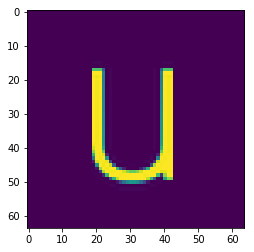

In [63]:
test_num = 1001

test = X_subset_test[test_num]
test = np.reshape(test, (1,64,64,1))

print(all_chars[np.argmax(y_subset_test[test_num])])
display(X_subset_test[test_num])

In [79]:
predictions = model.predict(X_subset_test)

In [67]:
from sklearn.metrics import classification_report, accuracy_score

In [88]:
print(np.argmax(predictions[0]))
print(np.argmax(y_subset_test[0]))


19
19


In [97]:
correct = 0

for i in range(len(predictions)):
    #print(np.argmax(predictions[i]), np.argmax(y_subset_test[i]))
    if np.argmax(predictions[i]) == np.argmax(y_subset_test[i]):
        correct += 1

accuracy = correct / len(predictions)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.32096


In [99]:
%%time

# Round 2
X_subset2 = X[100000:200000]
y_subset2 = y[100000:200000]

X_subset2 = X_subset2 / 255

X_subset_train2, X_subset_test2, y_subset_train2, y_subset_test2 = train_test_split(X_subset2, 
                                                                                y_subset2, 
                                                                                test_size = .25, 
                                                                                random_state = 42
                                                                               )
print(X_subset_train2.shape)

(75000, 64, 64, 1)
CPU times: user 3.3 s, sys: 2.62 s, total: 5.92 s
Wall time: 5.92 s


In [ ]:
batch_size = 256
epochs = 8

checkpointer = ModelCheckpoint(filepath='font_model.h5', 
                               verbose=1, 
                               save_best_only=True, 
                               monitor='acc',
                              )

history = model.fit(X_subset_train2, 
          y_subset_train2, 
          epochs=epochs, 
          batch_size=batch_size, 
          callbacks=[checkpointer],
          validation_split=0.25,
          verbose=1
         )

Train on 56250 samples, validate on 18750 samples
Epoch 1/8
56250/56250 [==============================] - 12950s - loss: 1.5476 - acc: 0.5755 - val_loss: 2.1517 - val_acc: 0.4213
Epoch 2/8
56250/56250 [==============================] - 12956s - loss: 1.2975 - acc: 0.6286 - val_loss: 1.9125 - val_acc: 0.4649
Epoch 3/8
56250/56250 [==============================] - 12977s - loss: 1.1279 - acc: 0.6660 - val_loss: 4.9802 - val_acc: 0.1790
Epoch 4/8
56250/56250 [==============================] - 12980s - loss: 0.9863 - acc: 0.6997 - val_loss: 1.5915 - val_acc: 0.5370
Epoch 5/8
56250/56250 [==============================] - 12978s - loss: 0.8628 - acc: 0.7262 - val_loss: 1.6000 - val_acc: 0.5594
Epoch 6/8
56250/56250 [==============================] - 12969s - loss: 0.7564 - acc: 0.7533 - val_loss: 1.8624 - val_acc: 0.4856
Epoch 7/8
56250/56250 [==============================] - 12958s - loss: 0.6673 - acc: 0.7768 - val_loss: 1.9224 - val_acc: 0.4980
Epoch 8/8
56250/56250 [=================

In [ ]:
model.save("font_model_second100000samples_8epochs.h5")

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


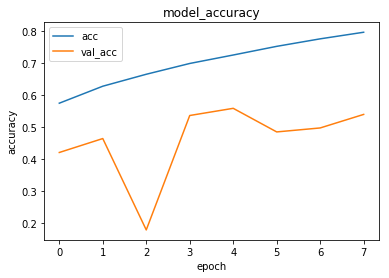

In [ ]:
print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc','val_acc'], loc='upper left')
plt.show()

In [ ]:
predictions2 = model.predict(X_subset_test2)

correct = 0

for i in range(len(predictions)):
    #print(np.argmax(predictions[i]), np.argmax(y_subset_test[i]))
    if np.argmax(predictions2[i]) == np.argmax(y_subset_test2[i]):
        correct += 1

accuracy = correct / len(predictions2)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.53556
